In [2]:
import numpy as np
import pandas as pd
import bokeh as bk

import matplotlib.pyplot as plt
#import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from IPython.display import HTML

import seaborn as sns 
sns.set() 
plt.rcParams['lines.markeredgewidth'] = 1 


In [3]:
tracking_data = pd.read_csv('metro_data.csv', encoding = 'latin1', sep = ';')
tracking_data.set_index(['FixationIndex'], inplace = True)


In [4]:
df_test = tracking_data[tracking_data['StimuliName'] == '09_Tokyo_S1.jpg']
#df_test.reset_index(drop = True, inplace = True)

In [5]:
#levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

cut_length = 70

df_test['x_level'] = pd.cut(df_test['MappedFixationPointX'], cut_length)
df_test['y_level'] = pd.cut(df_test['MappedFixationPointY'], cut_length)

df_grouped = df_test.groupby(['y_level', 'x_level']).count().reset_index()
df_grouped['count'] = df_grouped['StimuliName'].fillna(0)
df_grouped

df_matrix = df_grouped.pivot('y_level', 'x_level', 'count')


C:\Users\20190771\.conda\envs\orange\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\20190771\.conda\envs\orange\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


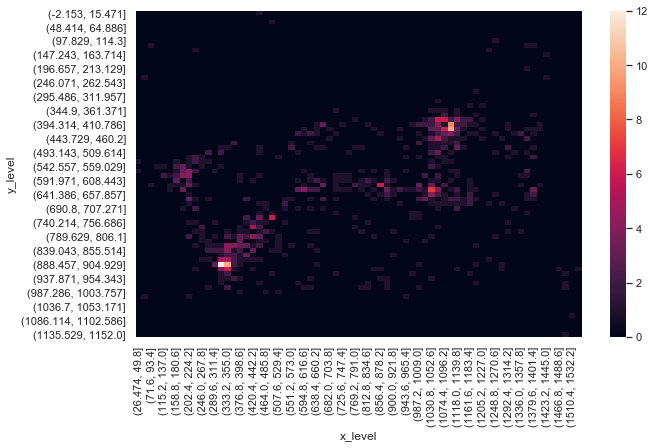

In [6]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df_matrix, square = False, ax = ax)

In [7]:
df_test_p1 = df_test[df_test['user'] == 'p1']
df_test_p1.reset_index(drop = True, inplace = True)

len(df_test_p1)

16

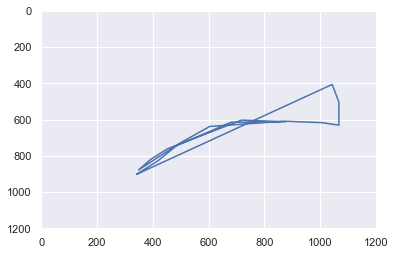

In [8]:
x_data = []
y_data = []

fig, ax = plt.subplots()
ax.set_xlim(0,1200)
ax.set_ylim(1200, 0)

line, = ax.plot(0,0)

def animate(i):
    x_data.append(df_test_p1['MappedFixationPointX'].loc[i])
    y_data.append(df_test_p1['MappedFixationPointY'].loc[i])
    
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    return line

animation = FuncAnimation(fig, func = animate, frames = np.arange(0, len(df_test_p1), 1))

animation.save('filename.mp4', writer = 'ffmpeg')